Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/praktikumML/tugas09"

In [5]:
cancer_data = pd.read_csv(path + "/data/survey lung cancer.csv")
cancer_data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Info Dataset

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Statistik Deskriptif

In [7]:
cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Cek Missing Value

In [8]:
cancer_data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


Cek Distribusi Target

In [9]:
cancer_data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


Encoding

In [10]:
for col in cancer_data.columns:
    if cancer_data[col].dtype == 'object':      # encode kategori
        cancer_data[col] = cancer_data[col].map({'YES': 1, 'NO': 0, 'M': 1, 'F': 0})

In [11]:
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Pemilihan Fitur

In [12]:
X = cancer_data.drop(columns=['LUNG_CANCER'])
y = cancer_data['LUNG_CANCER']

X.shape, y.shape

((309, 15), (309,))

Split Data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

x_train.shape, x_test.shape

((247, 15), (62, 15))

Scaling Data

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train Naive Bayes

In [15]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

GaussianNB()

Prediksi Train

In [16]:
train_pred_nb = nb_model.predict(x_train_scaled)
train_acc_nb = accuracy_score(y_train, train_pred_nb)
train_acc_nb

0.9271255060728745

Prediksi Test

In [17]:
test_pred_nb = nb_model.predict(x_test_scaled)
test_acc_nb = accuracy_score(y_test, test_pred_nb)
test_acc_nb

0.8548387096774194

Confusion Matrix

In [18]:
cm_nb = confusion_matrix(y_test, test_pred_nb)
cm_nb

array([[ 4,  4],
       [ 5, 49]])

Heatmap

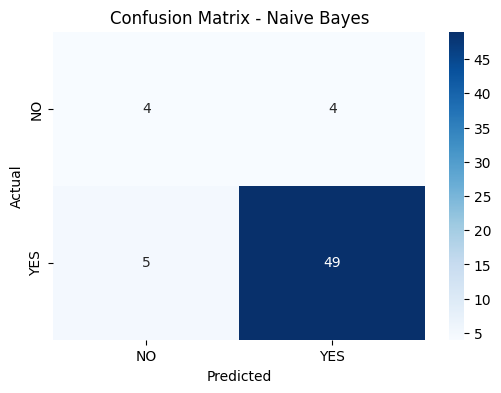

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report

In [20]:
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, test_pred_nb))

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.92      0.91      0.92        54

    accuracy                           0.85        62
   macro avg       0.68      0.70      0.69        62
weighted avg       0.86      0.85      0.86        62



Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

cv_nb = cross_val_score(nb_model, scaler.transform(X), y, cv=5, scoring='accuracy')

print("Naive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Dev:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [0.91935484 0.85483871 0.96774194 0.83870968 0.93442623]
Mean Accuracy: 0.9030142781597039
Std Dev: 0.04878393445438614
